<a href="https://colab.research.google.com/github/SakshiKasture/MNIST_digit_classification/blob/main/Implementation_with_pytorch_and_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# **Load the Dataset**

In [3]:
#Define a transformation
'''transforms.Compose() is used to chain multiple image transformations together.
This transformation converts the image from a PIL (Python Imaging Library) or NumPy array format to a PyTorch tensor.
Additionally, it normalizes the pixel values of the image to a range of [0, 1] by dividing by 255.
This step is essential because neural networks typically work with tensors, not images.
It converts an image of shape (H, W, C) (Height, Width, Channels) into a tensor of shape (C, H, W).
transforms.Normalize(mean, std)
This transformation normalizes the image tensor by subtracting the mean and dividing by the standard deviation.
It makes the model training more stable by ensuring the data has a standard distribution (zero mean, unit variance).
The mean and std values depend on the dataset. For MNIST, the mean and std are often chosen as (0.5,) to bring pixel values into a roughly centered range.
After normalization, the tensor will have a mean of 0 and a standard deviation of 1.
Normalize works on tensors, not on images. If you try to apply Normalize directly to an image, it will raise an error because
Normalize expects a tensor as input, and the image is still in its original format (e.g., PIL or NumPy).
The image needs to be converted to a tensor first using ToTensor(), and then Normalize() can operate on the tensor.'''

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

#Load the datasets and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

#Creation of Dataloaders
dataloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 351kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.05MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Building the Neural Network**

In [17]:
#Input Layer (28 * 28): Matches the flattened size of the MNIST input image (28x28 pixels).
'''Hidden Layers (128, 64):

These are chosen based on how complex the task is and how much information needs to be learned.
Larger values like 128 allow the network to learn more features but increase computational cost.
Smaller values like 64 reduce computation but might limit the model's capacity.
Common practice: Start with a reasonable size (e.g., 128) and decrease gradually (64) as you go deeper.
In summary, the sizes (128, 64, etc.) are hyperparameters and are chosen based on experimentation, considering the task's complexity and computational efficiency.'''
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
     # Input layer: 28x28 images (flattened to 784 features)
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10) # Output layer (10 classes for MNIST digits)

  def forward(self,x):
     x = x.view(x.size(0), -1)
      #ReLU (Rectified Linear Unit) is applied to introduce non-linearity, allowing the model to learn complex patterns in the data.
     x = torch.relu(self.fc1(x)) # Apply ReLU activation
     x = torch.relu(self.fc2(x)) # Apply ReLU activation
     x = self.fc3(x) # Output layer
     return x

# **Setup of Loss function and Optimizer**

In [18]:
# Instantiate the model
model = SimpleNN()

# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss() # For classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# **Train the model**

In [19]:
# Training loop
'''This loop runs the training process for a specified number of epochs (iterations over the entire dataset).
Each epoch means the model sees all the training data once.running_loss = 0.0
This variable tracks the cumulative loss within a single epoch, helping to monitor how well the model is learning.
Here, trainloader (a PyTorch DataLoader) provides batches of training data. Each batch contains:
inputs: Features (e.g., images).
labels: Corresponding targets (e.g., class labels).
enumerate gives both the batch index i and the data (inputs, labels).
Imp step - optimizer.zero_grad()
Gradients from the previous batch are cleared. If this step is skipped, gradients will accumulate, leading to incorrect updates during backpropagation.
outputs = model(inputs)
The inputs are passed through the model, which computes predictions (outputs). This is called the forward pass and is the starting point for calculating loss.
'''
epochs = 5 # Number of epochs to train
for epoch in range(epochs):
  running_loss = 0.0
  for i, (inputs, labels) in enumerate(dataloader,0):
    optimizer.zero_grad() # Zero the parameter gradients
  # Forward pass
    outputs = model(inputs)
     # Calculate loss
     #The labels are typically obtained from the DataLoader during the training loop, where each batch provides both inputs (features) and labels (targets).
    loss = criterion(outputs, labels)
    # Backward pass and optimization
    #Computes the gradients of the loss with respect to all the model's parameters (weights and biases).
    #The computed gradients are essential for updating the model's parameters during optimization.
    loss.backward()
    #The optimizer (e.g., Adam, SGD) adjusts the parameters in the direction that minimizes the loss.
    #This is the step where learning happens.
    optimizer.step()
    #Adds the current batch's loss to running_loss.
    #loss.item() extracts the scalar value of the loss (as PyTorch's loss tensor holds more than just the number).
    running_loss += loss.item()

    if i % 100 == 99:
      '''Every 100 batches (i % 100 == 99), print the average loss for those batches.
          The loss is averaged by dividing running_loss by 100.
          Helps monitor whether the loss is decreasing over time, indicating effective learning.
          After printing, running_loss is reset to 0.0 for the next 100 batches.
          '''
      print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}")
      running_loss = 0.0
print("Finished training!")

Epoch 1, Batch 100, Loss: 1.3167
Epoch 1, Batch 200, Loss: 0.5599
Epoch 1, Batch 300, Loss: 0.4627
Epoch 1, Batch 400, Loss: 0.4177
Epoch 1, Batch 500, Loss: 0.3684
Epoch 1, Batch 600, Loss: 0.3582
Epoch 1, Batch 700, Loss: 0.3168
Epoch 1, Batch 800, Loss: 0.3316
Epoch 1, Batch 900, Loss: 0.2984
Epoch 1, Batch 1000, Loss: 0.2784
Epoch 1, Batch 1100, Loss: 0.2774
Epoch 1, Batch 1200, Loss: 0.2764
Epoch 1, Batch 1300, Loss: 0.2632
Epoch 1, Batch 1400, Loss: 0.2737
Epoch 1, Batch 1500, Loss: 0.2562
Epoch 1, Batch 1600, Loss: 0.2317
Epoch 1, Batch 1700, Loss: 0.2391
Epoch 1, Batch 1800, Loss: 0.2148
Epoch 2, Batch 100, Loss: 0.2147
Epoch 2, Batch 200, Loss: 0.2040
Epoch 2, Batch 300, Loss: 0.1907
Epoch 2, Batch 400, Loss: 0.2034
Epoch 2, Batch 500, Loss: 0.2110
Epoch 2, Batch 600, Loss: 0.1993
Epoch 2, Batch 700, Loss: 0.1696
Epoch 2, Batch 800, Loss: 0.1754
Epoch 2, Batch 900, Loss: 0.1919
Epoch 2, Batch 1000, Loss: 0.1539
Epoch 2, Batch 1100, Loss: 0.1808
Epoch 2, Batch 1200, Loss: 0.147

## Evaluate the model

In [21]:
#Evaluate the model
correct = 0
total = 0
#Disables gradient calculation during evaluation/testing, saving memory and computation since gradients are only needed during training.
with torch.no_grad():
  for inputs, labels in testloader:
    outputs = model(inputs)
    '''outputs.data: Contains the model's raw predictions (logits or probabilities) for each class.
torch.max(outputs.data, 1): Identifies the class with the highest value (confidence) along dimension 1 (class axis).
 #Finds the predicted class for each input in the batch. The placeholder _ is used to indicate that we are intentionally ignoring the actual
 maximum values returned by torch.max. This simplifies the code and makes it clear that only the indices (predicted classes) are needed for further processing
 '''
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0) #labels.size(0) gives the batch size.
    '''Compares predicted (model predictions) with labels (true targets).
(predicted == labels) generates a boolean tensor where True indicates correct predictions.
.sum(): Counts the number of True values (correct predictions).
.item(): Converts the resulting tensor into a Python scalar, which is then added to correct.This code evaluates the model's performance on the test dataset
by calculating how many predictions match the actual labels, which can then be used to compute the accuracy:
'''
    correct += (predicted == labels).sum().item()
print(f"Accuracy on the test set: {100 * correct / total}%")

Accuracy on the test set: 97.04%


# Visualize Predictions

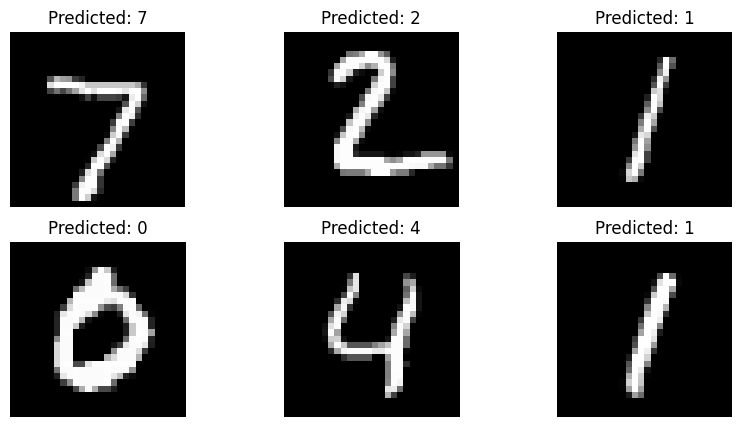

In [24]:
# Visualize some test images and the model's predictions
#Evaluating the model gives overall metrics, while fetching and analyzing a batch like this is useful for detailed, per-sample inspection
#This step, however, allows you to inspect individual predictions for a batch of images, which is not possible during standard evaluation.
'''iter() converts the DataLoader into an iterator so you can manually step through its batches. It is done to To manually fetch a batch of data from the test dataset.
.next() fetches the next batch of data (images and corresponding labels) from the iterator.
images contains the batch of input data (test images).
labels contains the correct labels for these test images. It is done to To get one batch of data for making predictions and evaluating the model.
torch.max(outputs, 1) calculates the maximum value along dimension 1 (class dimension) of outputs.
The first value (_) is the maximum value (not used here).
The second value (predicted) is the index (class label) corresponding to the maximum value for each sample in the batch.
To determine the predicted class labels for the test images by finding the class with the highest probability or score.
This code manually fetches a batch of test images and labels, passes the images through the model to get predictions,
and determines the predicted class labels by selecting the class with the highest score for each image.'''
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

#Plot the images
#Creates a figure for plotting with a size of 10x5 inches.
fig = plt.figure(figsize=(10, 5))
#Iterates over the first 6 images in the batch.
for i in range(6):
  #Creates a grid of subplots with 2 rows and 3 columns. Places each image in the next available subplot.
    ax = fig.add_subplot(2, 3, i + 1)
    #Converts the ith image from a tensor to a NumPy array and displays it in grayscale.
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    #Sets the title of the subplot to show the predicted label for the corresponding image.
    ax.set_title(f"Predicted: {predicted[i].item()}")
    #Removes axis labels for a cleaner look.
    ax.axis('off')

plt.show()